In [308]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
data = pd.read_excel("CDR_6_MRIfull.xlsx")
data

,SEX,INDEPEND,MEMORY,ORIENT,JUDGMENT,COMMUN,HOMEHOBB,PERSCARE,CDRGLOB,NPISCORE,...,RSUPFR,RSUPFRM,RSUPPAR,RSUPPARM,RSUPTEM,RSUPTEMM,RSUPMAR,RSUPMARM,RTRTEM,RTRTEMM
0,2,1,0,0,0,0,0,0,0,0,...,0.022229,0.002573,0.012313,0.001690,0.013390,0.002362,0.008422,0.001901,0.000727,0.001242
1,2,1,0,0,0,0,0,0,0,0,...,0.024551,0.002161,0.009114,0.001402,0.011982,0.001958,0.007428,0.001745,0.001002,0.001436
2,2,1,0,0,0,0,0,0,0,0,...,0.023044,0.002528,0.011245,0.001631,0.014259,0.002555,0.009018,0.001929,0.001011,0.001175
3,1,1,0,0,0,0,0,0,0,1,...,0.025236,0.001905,0.010176,0.001439,0.014644,0.001889,0.008720,0.001722,0.001107,0.001664
4,2,1,0,0,0,0,0,0,0,0,...,0.024523,0.001865,0.009781,0.001139,0.014733,0.001973,0.008312,0.001255,0.000858,0.001543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,2,1,0,0,0,0,0,0,0,2,...,0.025420,0.002925,0.011830,0.001772,0.012750,0.002526,0.009636,0.002026,0.001097,0.001902
1596,2,1,0,0,0,0,0,0,0,0,...,0.024433,0.002743,0.010769,0.001696,0.013166,0.002124,0.007746,0.002225,0.000581,0.001011
1597,1,2,2,2,2,2,2,2,2,7,...,0.028646,0.002051,0.010201,0.001462,0.012770,0.001882,0.010078,0.001834,0.000549,0.001365
1598,2,1,0,0,0,0,0,0,0,2,...,0.026394,0.002981,0.009892,0.001980,0.014052,0.002180,0.009527,0.002300,0.001162,0.001734


Not:t-SNE'de kritik olan şeyler;
Outliers ve scaling yapılması.

>## TASK-12A: Please use linear (PCA) and nonlinear (LLE, ISOMAP) dimensionality reduction methods using MR metrics to visualize the patients with their different CDRGLOB values/levels to understand whether there are visible patterns. Please first only use the first two dimensions in your visualizations.

In [309]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA


>**12A_A)PCA:**

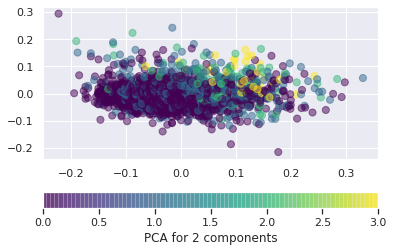

In [310]:
X = data.iloc[:,15:]
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X)
y = data["CDRGLOB"]
plt.scatter(projected[:, 0], projected[:, 1],s=50,alpha=0.5, c=y,cmap='viridis')
plt.colorbar(label="PCA for 2 components", orientation="horizontal")

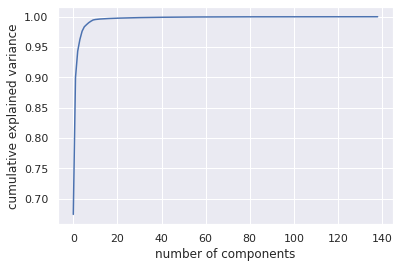

In [311]:
pca_all = PCA().fit(X)
plt.plot(np.cumsum(pca_all.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [312]:
pca_95 = PCA(0.95).fit(X)
pca_95.n_components_

4

In [313]:
X_pca_95 = pca_95.transform(X)

In [314]:
X_pca_95

array([[-0.19439123,  0.00136327, -0.00227371, -0.01009811],
       [-0.17377926, -0.01903505, -0.00072734, -0.00571283],
       [-0.16942477, -0.01570903,  0.02288737, -0.00149719],
       ...,
       [ 0.28352587,  0.05382694, -0.01935954, -0.007212  ],
       [ 0.2973535 ,  0.04145494,  0.03156549,  0.03075551],
       [ 0.33026816,  0.05730002,  0.01067404,  0.02898164]])

>**12A_B)LLE:**

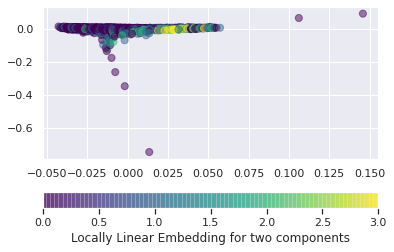

In [315]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2, method='modified',
                               eigen_solver='dense')
LLE_out = lle.fit_transform(X)
plt.scatter(LLE_out[:,0],LLE_out[:,1],s=50,alpha=0.5, c=y,cmap='viridis')
plt.colorbar(label="Locally Linear Embedding for two components", orientation="horizontal")

>**12A_C)Isomap:**

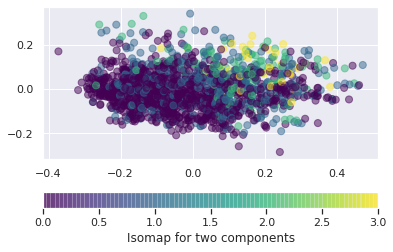

In [316]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(X)
plt.scatter(proj[:,0],proj[:,1],s=50,alpha=0.5, c=y,cmap='viridis')
plt.colorbar(label="Isomap for two components", orientation="horizontal")

>**12A_D)MDS:**

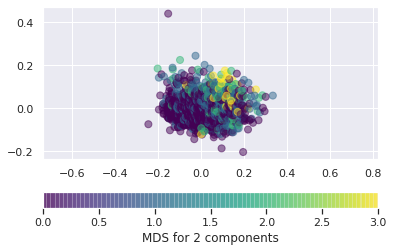

In [317]:
from sklearn.manifold import MDS
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X)
plt.scatter(out3[:, 0], out3[:, 1], s=50,alpha=0.5, c=y,cmap='viridis')
plt.colorbar(label="MDS for 2 components", orientation="horizontal")
plt.axis('equal');

>## TASK-12B: Please develop 3 separate predictive models with respect to the datasets with reduced dimensions (but use dimension/component number as 7) in part-A. Then use 3 different algorithms to provide classification models to predict CDRGLOB and compare the outputs of these 9 models. (train-test split = 0.75 and 0.25) 3 algorithms are Gaussian Naive Bayes, SVM (rbf), and RandomForestClassifier.

### 12B_A)Lets Use 3 Different Classification Algorithms with PCA Dimension Reduction Method.

In [318]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,15:]
y = data["CDRGLOB"]
pca = PCA(7)  
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size=0.75, stratify=y)

>**12B_A_1)Gaussian Naive Bayes (with default parameters) with PCA:**

In [319]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred_gnb)

0.655

Text(80.90000000000006, 0.5, 'true value')

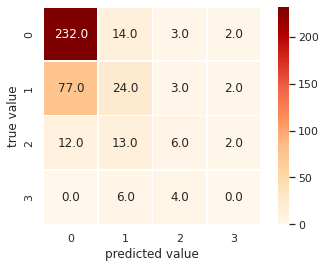

In [320]:
mat = confusion_matrix(y_test,y_pred_gnb)
sns.heatmap(mat, square=True, annot=True, cmap = "OrRd",cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [321]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(y_test, y_pred_gnb, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.72      0.92      0.81       251
     class 1       0.42      0.23      0.29       106
     class 2       0.38      0.18      0.24        33
     class 3       0.00      0.00      0.00        10

    accuracy                           0.66       400
   macro avg       0.38      0.33      0.34       400
weighted avg       0.60      0.66      0.61       400



>**12B_A_2)SVM (rbf) (with default parameters) with PCA:**

In [322]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

svc=SVC(kernel='rbf')
y_pred_svc = svc.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred_svc)

0.635

Text(80.90000000000006, 0.5, 'true value')

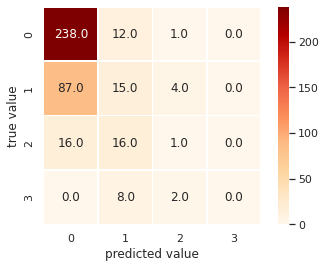

In [323]:
mat = confusion_matrix(y_test,y_pred_svc)
sns.heatmap(mat, square=True, annot=True, cmap = "OrRd",cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [324]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(y_test, y_pred_svc, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.70      0.95      0.80       251
     class 1       0.29      0.14      0.19       106
     class 2       0.12      0.03      0.05        33
     class 3       0.00      0.00      0.00        10

    accuracy                           0.64       400
   macro avg       0.28      0.28      0.26       400
weighted avg       0.53      0.64      0.56       400



>**12B_A_3)RandomForestClassifier (with default parameters) with PCA:**

In [325]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

rfc=RandomForestClassifier()
y_pred_rfc = rfc.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred_rfc)

0.655

Text(80.90000000000006, 0.5, 'true value')

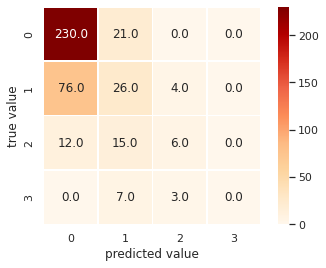

In [326]:
mat = confusion_matrix(y_test,y_pred_rfc)
sns.heatmap(mat, square=True, annot=True, cmap = "OrRd",cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [327]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(y_test, y_pred_rfc, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.72      0.92      0.81       251
     class 1       0.38      0.25      0.30       106
     class 2       0.46      0.18      0.26        33
     class 3       0.00      0.00      0.00        10

    accuracy                           0.66       400
   macro avg       0.39      0.34      0.34       400
weighted avg       0.59      0.66      0.61       400



### 12B_B)Lets Use 3 Different Classification Algorithms with LLE Dimension Reduction Method.

In [328]:
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=7, method='modified',eigen_solver='dense')
X_lle = lle.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_lle, y, train_size=0.75, stratify=y)

>**12B_B_1)Gaussian Naive Bayes (with default parameters) with LLE:**

In [329]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred_gnb)

0.6125

Text(80.90000000000006, 0.5, 'true value')

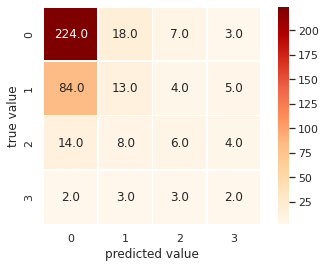

In [330]:
mat = confusion_matrix(y_test,y_pred_gnb)
sns.heatmap(mat, square=True, annot=True, cmap = "OrRd",cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [331]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(y_test, y_pred_gnb, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.69      0.89      0.78       252
     class 1       0.31      0.12      0.18       106
     class 2       0.30      0.19      0.23        32
     class 3       0.14      0.20      0.17        10

    accuracy                           0.61       400
   macro avg       0.36      0.35      0.34       400
weighted avg       0.55      0.61      0.56       400



>**12B_B_2)SVM (rbf) (with default parameters) with LLE:**

In [332]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

svc=SVC(kernel='rbf')
y_pred_svc = svc.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred_svc)

0.635

Text(80.90000000000006, 0.5, 'true value')

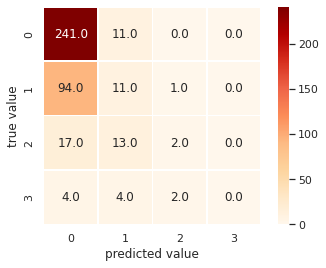

In [333]:
mat = confusion_matrix(y_test,y_pred_svc)
sns.heatmap(mat, square=True, annot=True, cmap = "OrRd",cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [334]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(y_test, y_pred_svc, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.68      0.96      0.79       252
     class 1       0.28      0.10      0.15       106
     class 2       0.40      0.06      0.11        32
     class 3       0.00      0.00      0.00        10

    accuracy                           0.64       400
   macro avg       0.34      0.28      0.26       400
weighted avg       0.53      0.64      0.55       400



>**12B_B_3)RandomForestClassifier (with default parameters) with LLE:**

In [335]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

rfc=RandomForestClassifier()
y_pred_rfc = rfc.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred_rfc)

0.615

Text(80.90000000000006, 0.5, 'true value')

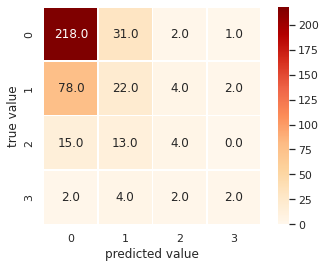

In [336]:
mat = confusion_matrix(y_test,y_pred_rfc)
sns.heatmap(mat, square=True, annot=True, cmap = "OrRd",cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [337]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(y_test, y_pred_rfc, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.70      0.87      0.77       252
     class 1       0.31      0.21      0.25       106
     class 2       0.33      0.12      0.18        32
     class 3       0.40      0.20      0.27        10

    accuracy                           0.61       400
   macro avg       0.44      0.35      0.37       400
weighted avg       0.56      0.61      0.57       400



### 12B_C)Lets Use 3 Different Classification Algorithms with ISOMAP Dimension Reduction Method.

In [338]:
ısomap = Isomap(n_components=7)
X_ıso = ısomap.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_ıso, y, train_size=0.75, stratify=y)

>**12B_C_1)Gaussian Naive Bayes (with default parameters) with Isomap:**

In [339]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred_gnb)

0.635

Text(80.90000000000006, 0.5, 'true value')

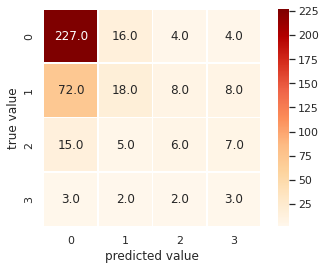

In [340]:
mat = confusion_matrix(y_test,y_pred_gnb)
sns.heatmap(mat, square=True, annot=True, cmap = "OrRd",cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [341]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(y_test, y_pred_gnb, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.72      0.90      0.80       251
     class 1       0.44      0.17      0.24       106
     class 2       0.30      0.18      0.23        33
     class 3       0.14      0.30      0.19        10

    accuracy                           0.64       400
   macro avg       0.40      0.39      0.36       400
weighted avg       0.59      0.64      0.59       400



>**12B_C_2)SVM (rbf) (with default parameters) with Isomap:**

In [342]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

svc=SVC(kernel='rbf')
y_pred_svc = svc.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred_svc)

0.655

Text(80.90000000000006, 0.5, 'true value')

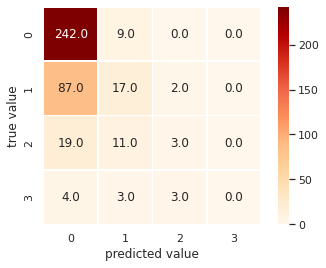

In [343]:
mat = confusion_matrix(y_test,y_pred_svc)
sns.heatmap(mat, square=True, annot=True, cmap = "OrRd",cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [344]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(y_test, y_pred_svc, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.69      0.96      0.80       251
     class 1       0.42      0.16      0.23       106
     class 2       0.38      0.09      0.15        33
     class 3       0.00      0.00      0.00        10

    accuracy                           0.66       400
   macro avg       0.37      0.30      0.30       400
weighted avg       0.57      0.66      0.58       400



>**12B_B_3)RandomForestClassifier (with default parameters) with Isomap:**

In [345]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

rfc=RandomForestClassifier()
y_pred_rfc = rfc.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred_rfc)

0.6375

Text(80.90000000000006, 0.5, 'true value')

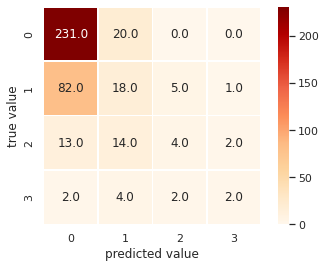

In [346]:
mat = confusion_matrix(y_test,y_pred_rfc)
sns.heatmap(mat, square=True, annot=True, cmap = "OrRd",cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [347]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(y_test, y_pred_rfc, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.70      0.92      0.80       251
     class 1       0.32      0.17      0.22       106
     class 2       0.36      0.12      0.18        33
     class 3       0.40      0.20      0.27        10

    accuracy                           0.64       400
   macro avg       0.45      0.35      0.37       400
weighted avg       0.57      0.64      0.58       400



>## TASK-12B(Bonus): Please develop 3 separate predictive models with respect to the datasets with reduced dimensions (but use dimension/component number as 7) in part-A. Then use 3 different algorithms to provide classification models to predict CDRGLOB and compare the outputs of these 9 models. (train-test split = 0.75 and 0.25) 3 algorithms are Gaussian Naive Bayes, SVM (rbf), and RandomForestClassifier.(Use GridSearch to optimize these algorithms.)

>A)Classifier Algorithms with PCA:

In [348]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
pca = PCA(7)  
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y,train_size=0.75,stratify=y)

>A.1)Gaussian Naive Bayes Classifier (with PCA):

In [349]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
gnb=GaussianNB()
params_gridNB = {'var_smoothing': np.logspace(0,-9, num=100)}
grid = GridSearchCV(gnb,param_grid=params_gridNB,cv=5) 
grid.fit(X_train, y_train)
grid.best_params_

{'var_smoothing': 0.01}

In [350]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting
from sklearn.metrics import accuracy_score
model1 = grid.best_estimator_
y2_pred = gnb.fit(X_train, y_train).predict(X_test)
score=cross_val_score(gnb, X_train, y_train)
score.mean()

0.6508333333333333

In [351]:
accuracy_score(y_test, y2_pred)

0.6225

Text(80.90000000000006, 0.5, 'true value')

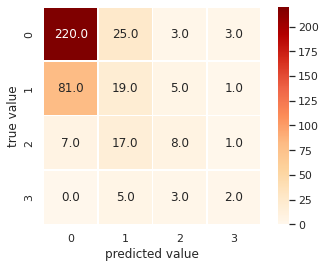

In [352]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y2_pred)
sns.heatmap(mat, square=True, annot=True, cmap = "OrRd",cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [353]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(y_test, y2_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.71      0.88      0.79       251
     class 1       0.29      0.18      0.22       106
     class 2       0.42      0.24      0.31        33
     class 3       0.29      0.20      0.24        10

    accuracy                           0.62       400
   macro avg       0.43      0.37      0.39       400
weighted avg       0.57      0.62      0.58       400



>A.2)Support Vector Classifier (with PCA):

In [354]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
model1=SVC()
param_grid1 = {"C": np.linspace(2.0,5.0, num = 4),
              'kernel':['poly', 'rbf', 'sigmoid'],
              'shrinking':[True,False],
              "degree": [3,4,5]}
grid1 = GridSearchCV(model1, param_grid1,cv=5)
grid1.fit(X_train, y_train)
grid1.best_params_

{'C': 4.0, 'degree': 3, 'kernel': 'rbf', 'shrinking': True}

In [355]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting
from sklearn.metrics import accuracy_score
model1 = grid1.best_estimator_
y2_pred = model1.fit(X_train, y_train).predict(X_test)
score=cross_val_score(model1, X_train, y_train)
score.mean()

0.6658333333333334

In [356]:
accuracy_score(y_test, y2_pred)

0.635

Text(80.90000000000006, 0.5, 'true value')

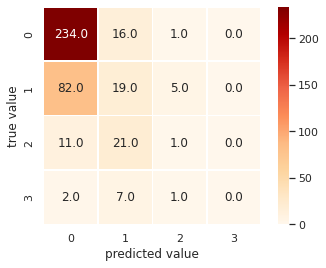

In [357]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y2_pred)
sns.heatmap(mat, square=True, annot=True, cmap = "OrRd",cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [358]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(y_test, y2_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.71      0.93      0.81       251
     class 1       0.30      0.18      0.22       106
     class 2       0.12      0.03      0.05        33
     class 3       0.00      0.00      0.00        10

    accuracy                           0.64       400
   macro avg       0.28      0.29      0.27       400
weighted avg       0.54      0.64      0.57       400



A.3)Random Forest Classifier(with PCA):

In [359]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

model2=RandomForestClassifier()
param_grid2 = {'n_estimators':[100,110,120,130],
              'criterion':['gini', 'entropy', 'log_loss'],
              'min_samples_split':[2,3,4],
              'max_features':['sqrt', 'log2']}
grid2 = GridSearchCV(model2, param_grid2, cv=3)

In [360]:
grid2.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 110, 120, 130]})

In [361]:
grid2.best_params_

{'criterion': 'entropy',
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'n_estimators': 130}

In [362]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() 
from sklearn.metrics import accuracy_score
model2 = grid2.best_estimator_
y2_pred2 = model2.fit(X_train, y_train).predict(X_test)
score=cross_val_score(model2, X_train, y_train, cv=3)
score.mean()

0.6641666666666667

In [363]:
accuracy_score(y_test, y2_pred2)

0.64

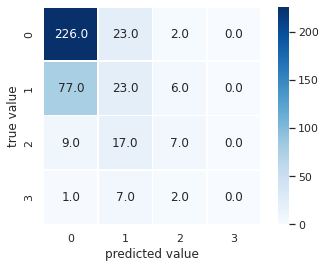

In [364]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y2_pred2)
sns.heatmap(mat, square=True, annot=True,cmap=plt.cm.Blues, cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

In [365]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(y_test, y2_pred2, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.72      0.90      0.80       251
     class 1       0.33      0.22      0.26       106
     class 2       0.41      0.21      0.28        33
     class 3       0.00      0.00      0.00        10

    accuracy                           0.64       400
   macro avg       0.37      0.33      0.34       400
weighted avg       0.57      0.64      0.60       400



A.4)Decision Tree Classifier(with PCA):

In [366]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

model3=DecisionTreeClassifier()
param_grid3 = {'criterion':['gini', 'entropy', 'log_loss'],
               'splitter':['best','random'],
               'min_samples_split':[2,3,4,5],
               'min_samples_leaf':[1,2,3,5],
              'max_features':['auto','sqrt', 'log2']}
grid3 = GridSearchCV(model3, param_grid3, cv=3)

In [367]:
grid3.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [368]:
grid3.best_params_

{'criterion': 'gini',
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'splitter': 'random'}

In [369]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting
from sklearn.metrics import accuracy_score
model3 = grid3.best_estimator_
y2_pred3 = model3.fit(X_train, y_train).predict(X_test)
score=cross_val_score(model3, X_train, y_train, cv=3)
score.mean()

0.6374999999999998

In [370]:
accuracy_score(y_test, y2_pred3)

0.6125

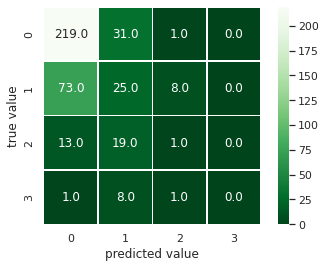

In [371]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y2_pred3)
sns.heatmap(mat, square=True, annot=True, cmap = "Greens_r",cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

In [372]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(y_test, y2_pred3, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.72      0.87      0.79       251
     class 1       0.30      0.24      0.26       106
     class 2       0.09      0.03      0.05        33
     class 3       0.00      0.00      0.00        10

    accuracy                           0.61       400
   macro avg       0.28      0.28      0.27       400
weighted avg       0.54      0.61      0.57       400



B)MDA:

In [373]:
from sklearn.manifold import MDS
mds_a = MDS(n_components=7, random_state=1)
X_mds = mds_a.fit_transform(X)

In [374]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_mds, y,train_size=0.75,stratify=y)

B.1)Gaussian Naive Bayes Classifier (with MDA):

In [375]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

gnb=GaussianNB()
params_gridNB = {'var_smoothing': np.logspace(0,-9, num=100)}
grid = GridSearchCV(gnb,param_grid=params_gridNB,cv=5) 
grid.fit(X_train, y_train)
grid.best_params_

{'var_smoothing': 1.0}

In [376]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting
from sklearn.metrics import accuracy_score
model1 = grid.best_estimator_
y2_pred = gnb.fit(X_train, y_train).predict(X_test)
score=cross_val_score(gnb, X_train, y_train)
score.mean()

0.5925

In [377]:
accuracy_score(y_test, y2_pred)

0.61

Text(80.90000000000006, 0.5, 'true value')

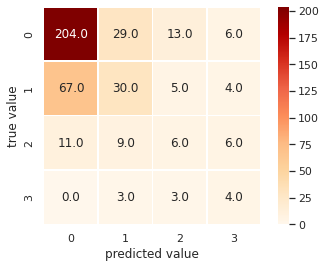

In [378]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y2_pred)
sns.heatmap(mat, square=True, annot=True, cmap = "OrRd",cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [379]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(y_test, y2_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.72      0.81      0.76       252
     class 1       0.42      0.28      0.34       106
     class 2       0.22      0.19      0.20        32
     class 3       0.20      0.40      0.27        10

    accuracy                           0.61       400
   macro avg       0.39      0.42      0.39       400
weighted avg       0.59      0.61      0.59       400



B.2)Support Vector Classifier (with MDA):

In [380]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
model1=SVC()
param_grid1 = {"C": np.linspace(2.0,5.0, num = 4),
              'kernel':['poly', 'rbf', 'sigmoid'],
              'shrinking':[True,False],
              "degree": [3,4,5]}
grid1 = GridSearchCV(model1, param_grid1,cv=5)
grid1.fit(X_train, y_train)
grid1.best_params_

{'C': 2.0, 'degree': 3, 'kernel': 'rbf', 'shrinking': True}

In [381]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting
from sklearn.metrics import accuracy_score
model1 = grid1.best_estimator_
y2_pred = model1.fit(X_train, y_train).predict(X_test)
score=cross_val_score(model1, X_train, y_train)
score.mean()

0.6583333333333334

In [382]:
accuracy_score(y_test, y2_pred)

0.625

Text(80.90000000000006, 0.5, 'true value')

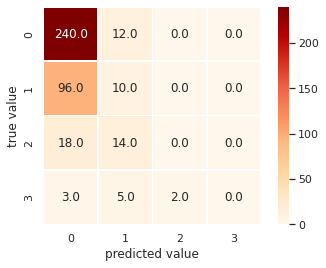

In [383]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y2_pred)
sns.heatmap(mat, square=True, annot=True, cmap = "OrRd",cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [384]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(y_test, y2_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.67      0.95      0.79       252
     class 1       0.24      0.09      0.14       106
     class 2       0.00      0.00      0.00        32
     class 3       0.00      0.00      0.00        10

    accuracy                           0.62       400
   macro avg       0.23      0.26      0.23       400
weighted avg       0.49      0.62      0.53       400



B.3)Random Forest Classifier(with MDA):

In [385]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

model2=RandomForestClassifier()
param_grid2 = {'n_estimators':[100,110,120,130],
              'criterion':['gini', 'entropy', 'log_loss'],
              'min_samples_split':[2,3,4],
              'max_features':['sqrt', 'log2']}
grid2 = GridSearchCV(model2, param_grid2, cv=3)

In [386]:
grid2.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 110, 120, 130]})

In [387]:
grid2.best_params_

{'criterion': 'entropy',
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 100}

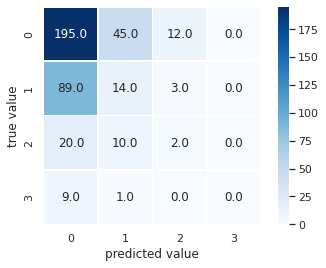

In [388]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y2_pred2)
sns.heatmap(mat, square=True, annot=True,cmap=plt.cm.Blues, cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

In [389]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(y_test, y2_pred2, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.62      0.77      0.69       252
     class 1       0.20      0.13      0.16       106
     class 2       0.12      0.06      0.08        32
     class 3       0.00      0.00      0.00        10

    accuracy                           0.53       400
   macro avg       0.24      0.24      0.23       400
weighted avg       0.45      0.53      0.48       400



B.4)Decision Tree Classifier(with MDA):

In [390]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

model3=DecisionTreeClassifier()
param_grid3 = {'criterion':['gini', 'entropy', 'log_loss'],
               'splitter':['best','random'],
               'min_samples_split':[2,3,4,5],
               'min_samples_leaf':[1,2,3,5],
              'max_features':['auto','sqrt', 'log2']}
grid3 = GridSearchCV(model3, param_grid3, cv=3)

In [391]:
grid3.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [392]:
grid3.best_params_

{'criterion': 'entropy',
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'splitter': 'random'}

In [393]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting
from sklearn.metrics import accuracy_score
model3 = grid3.best_estimator_
y2_pred3 = model3.fit(X_train, y_train).predict(X_test)
score=cross_val_score(model3, X_train, y_train, cv=3)
score.mean()

0.6258333333333334

In [394]:
accuracy_score(y_test, y2_pred3)

0.63

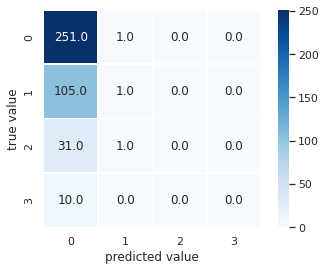

In [395]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y2_pred3)
sns.heatmap(mat, square=True, annot=True,cmap=plt.cm.Blues, cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

In [396]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(y_test, y2_pred3, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.63      1.00      0.77       252
     class 1       0.33      0.01      0.02       106
     class 2       0.00      0.00      0.00        32
     class 3       0.00      0.00      0.00        10

    accuracy                           0.63       400
   macro avg       0.24      0.25      0.20       400
weighted avg       0.49      0.63      0.49       400



C)Locally Linear Embedding (LLE):

In [397]:
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=7, method='modified',eigen_solver='dense')
X_lle = lle.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_lle, y, train_size=0.75, stratify=y)

C.1) Gaussian Naive Bayes Classifier with LLE:

In [398]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
gnb=GaussianNB()
params_gridNB = {'var_smoothing': np.logspace(0,-9, num=100)}
grid = GridSearchCV(gnb,param_grid=params_gridNB,cv=5) 
grid.fit(X_train, y_train)
grid.best_params_

{'var_smoothing': 0.657933224657568}

In [399]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting
from sklearn.metrics import accuracy_score
model1 = grid1.best_estimator_
y2_pred = model1.fit(X_train, y_train).predict(X_test)
score=cross_val_score(model1, X_train, y_train)
score.mean()

0.6425

In [400]:
accuracy_score(y_test, y2_pred)

0.6475

Text(80.90000000000006, 0.5, 'true value')

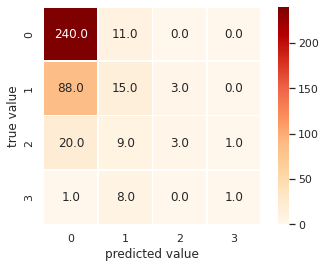

In [401]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y2_pred)
sns.heatmap(mat, square=True, annot=True, cmap = "OrRd",cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [402]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(y_test, y2_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.69      0.96      0.80       251
     class 1       0.35      0.14      0.20       106
     class 2       0.50      0.09      0.15        33
     class 3       0.50      0.10      0.17        10

    accuracy                           0.65       400
   macro avg       0.51      0.32      0.33       400
weighted avg       0.58      0.65      0.57       400



C.2)Decision Tree Classifier with LLE:

In [403]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

model3=DecisionTreeClassifier()
param_grid3 = {'criterion':['gini', 'entropy', 'log_loss'],
               'splitter':['best','random'],
               'min_samples_split':[2,3,4,5],
               'min_samples_leaf':[1,2,3,5],
              'max_features':['auto','sqrt', 'log2']}
grid3 = GridSearchCV(model3, param_grid3, cv=3)

In [404]:
grid3.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [405]:
grid3.best_params_

{'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'splitter': 'random'}

In [406]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting
from sklearn.metrics import accuracy_score
model3 = grid3.best_estimator_
y2_pred3 = model3.fit(X_train, y_train).predict(X_test)
score=cross_val_score(model3, X_train, y_train, cv=3)
score.mean()

0.6233333333333333

In [407]:
accuracy_score(y_test, y2_pred3)

0.6275

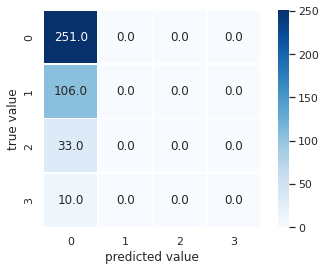

In [408]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y2_pred3)
sns.heatmap(mat, square=True, annot=True,cmap=plt.cm.Blues, cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

In [409]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(y_test, y2_pred3, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.63      1.00      0.77       251
     class 1       0.00      0.00      0.00       106
     class 2       0.00      0.00      0.00        33
     class 3       0.00      0.00      0.00        10

    accuracy                           0.63       400
   macro avg       0.16      0.25      0.19       400
weighted avg       0.39      0.63      0.48       400



C.3)Random Forest Classifier with LLE:

In [410]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

model2=RandomForestClassifier()
param_grid2 = {'n_estimators':[100,110,120,130],
              'criterion':['gini', 'entropy', 'log_loss'],
              'min_samples_split':[2,3,4],
              'max_features':['sqrt', 'log2']}
grid2 = GridSearchCV(model2, param_grid2, cv=3)

In [411]:
grid2.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 110, 120, 130]})

In [412]:
grid2.best_params_

{'criterion': 'entropy',
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 110}

In [413]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting
from sklearn.metrics import accuracy_score
model2 = grid2.best_estimator_
y2_pred = model2.fit(X_train, y_train).predict(X_test)
score=cross_val_score(model2, X_train, y_train)
score.mean()

0.6183333333333333

In [414]:
accuracy_score(y_test, y2_pred)

0.6375

Text(80.90000000000006, 0.5, 'true value')

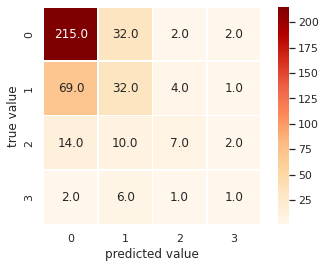

In [415]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y2_pred)
sns.heatmap(mat, square=True, annot=True, cmap = "OrRd",cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [416]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(y_test, y2_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.72      0.86      0.78       251
     class 1       0.40      0.30      0.34       106
     class 2       0.50      0.21      0.30        33
     class 3       0.17      0.10      0.12        10

    accuracy                           0.64       400
   macro avg       0.45      0.37      0.39       400
weighted avg       0.60      0.64      0.61       400



C.4)Support Vector Machines Classifier with LLE:

In [417]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
model1=SVC()
param_grid1 = {"C": np.linspace(2.0,5.0, num = 4),
              'kernel':['poly', 'rbf', 'sigmoid'],
              'shrinking':[True,False],
              "degree": [3,4,5]}
grid1 = GridSearchCV(model1, param_grid1,cv=5)
grid1.fit(X_train, y_train)
grid1.best_params_

{'C': 3.0, 'degree': 3, 'kernel': 'rbf', 'shrinking': True}

In [418]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting
from sklearn.metrics import accuracy_score
model1 = grid1.best_estimator_
y2_pred = model1.fit(X_train, y_train).predict(X_test)
score=cross_val_score(model1, X_train, y_train)
score.mean()

0.6458333333333333

In [419]:
accuracy_score(y_test, y2_pred)

0.65

Text(80.90000000000006, 0.5, 'true value')

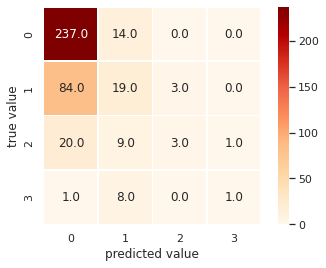

In [420]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y2_pred)
sns.heatmap(mat, square=True, annot=True, cmap = "OrRd",cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [421]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(y_test, y2_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.69      0.94      0.80       251
     class 1       0.38      0.18      0.24       106
     class 2       0.50      0.09      0.15        33
     class 3       0.50      0.10      0.17        10

    accuracy                           0.65       400
   macro avg       0.52      0.33      0.34       400
weighted avg       0.59      0.65      0.58       400



D)ISOMAP:

In [422]:
from sklearn.manifold import Isomap
ıso = Isomap(n_components=7)
X_ıso = ıso.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_ıso, y,train_size=0.75,stratify=y)

D.1)Gaussian Naive Bayes with Isomap:

In [423]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
gnb=GaussianNB()
params_gridNB = {'var_smoothing': np.logspace(0,-9, num=100)}
grid = GridSearchCV(gnb,param_grid=params_gridNB,cv=5) 
grid.fit(X_train, y_train)
grid.best_params_

{'var_smoothing': 0.02310129700083159}

In [424]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting
from sklearn.metrics import accuracy_score
model1 = grid1.best_estimator_
y2_pred = model1.fit(X_train, y_train).predict(X_test)
score=cross_val_score(model1, X_train, y_train)
score.mean()

0.6575

In [425]:
accuracy_score(y_test, y2_pred)

0.635

Text(80.90000000000006, 0.5, 'true value')

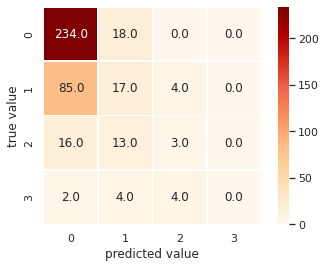

In [426]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y2_pred)
sns.heatmap(mat, square=True, annot=True, cmap = "OrRd",cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [427]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(y_test, y2_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.69      0.93      0.79       252
     class 1       0.33      0.16      0.22       106
     class 2       0.27      0.09      0.14        32
     class 3       0.00      0.00      0.00        10

    accuracy                           0.64       400
   macro avg       0.32      0.30      0.29       400
weighted avg       0.55      0.64      0.57       400



D.2)Decision Tree Classifier with Isomap:

In [428]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

model3=DecisionTreeClassifier()
param_grid3 = {'criterion':['gini', 'entropy', 'log_loss'],
               'splitter':['best','random'],
               'min_samples_split':[2,3,4,5],
               'min_samples_leaf':[1,2,3,5],
              'max_features':['auto','sqrt', 'log2']}
grid3 = GridSearchCV(model3, param_grid3, cv=3)

In [429]:
grid3.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [430]:
grid3.best_params_

{'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'splitter': 'random'}

In [431]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting
from sklearn.metrics import accuracy_score
model3 = grid3.best_estimator_
y2_pred3 = model3.fit(X_train, y_train).predict(X_test)
score=cross_val_score(model3, X_train, y_train, cv=3)
score.mean()

0.5916666666666667

In [432]:
accuracy_score(y_test, y2_pred3)

0.6125

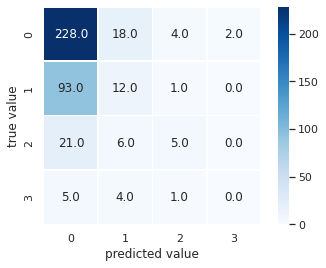

In [433]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y2_pred3)
sns.heatmap(mat, square=True, annot=True,cmap=plt.cm.Blues, cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

In [434]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(y_test, y2_pred3, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.66      0.90      0.76       252
     class 1       0.30      0.11      0.16       106
     class 2       0.45      0.16      0.23        32
     class 3       0.00      0.00      0.00        10

    accuracy                           0.61       400
   macro avg       0.35      0.29      0.29       400
weighted avg       0.53      0.61      0.54       400



D.3)Random Forest Classifier with Isomap:

In [435]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

model2=RandomForestClassifier()
param_grid2 = {'n_estimators':[100,110,120,130],
              'criterion':['gini', 'entropy', 'log_loss'],
              'min_samples_split':[2,3,4],
              'max_features':['sqrt', 'log2']}
grid2 = GridSearchCV(model2, param_grid2, cv=3)

In [436]:
grid2.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 110, 120, 130]})

In [437]:
grid2.best_params_

{'criterion': 'entropy',
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'n_estimators': 120}

In [438]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting
from sklearn.metrics import accuracy_score
model2 = grid2.best_estimator_
y2_pred = model2.fit(X_train, y_train).predict(X_test)
score=cross_val_score(model2, X_train, y_train)
score.mean()

0.6366666666666666

In [439]:
accuracy_score(y_test, y2_pred)

0.615

Text(80.90000000000006, 0.5, 'true value')

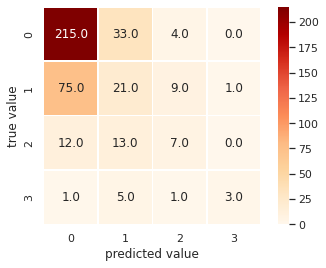

In [440]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y2_pred)
sns.heatmap(mat, square=True, annot=True, cmap = "OrRd",cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [441]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(y_test, y2_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.71      0.85      0.77       252
     class 1       0.29      0.20      0.24       106
     class 2       0.33      0.22      0.26        32
     class 3       0.75      0.30      0.43        10

    accuracy                           0.61       400
   macro avg       0.52      0.39      0.43       400
weighted avg       0.57      0.61      0.58       400



D.4)Support Vector Machines with Isomap:

In [442]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
model1=SVC()
param_grid1 = {"C": np.linspace(2.0,5.0, num = 4),
              'kernel':['poly', 'rbf', 'sigmoid'],
              'shrinking':[True,False],
              "degree": [3,4,5]}
grid1 = GridSearchCV(model1, param_grid1,cv=5)
grid1.fit(X_train, y_train)
grid1.best_params_

{'C': 2.0, 'degree': 3, 'kernel': 'rbf', 'shrinking': True}

In [443]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting
from sklearn.metrics import accuracy_score
model1 = grid1.best_estimator_
y2_pred = model1.fit(X_train, y_train).predict(X_test)
score=cross_val_score(model1, X_train, y_train)
score.mean()

0.6583333333333334

In [444]:
accuracy_score(y_test, y2_pred)

0.645

Text(80.90000000000006, 0.5, 'true value')

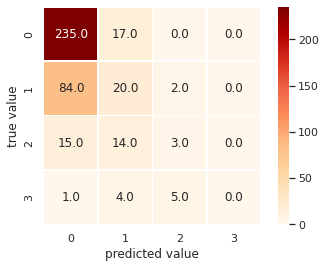

In [445]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y2_pred)
sns.heatmap(mat, square=True, annot=True, cmap = "OrRd",cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [446]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(y_test, y2_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.70      0.93      0.80       252
     class 1       0.36      0.19      0.25       106
     class 2       0.30      0.09      0.14        32
     class 3       0.00      0.00      0.00        10

    accuracy                           0.65       400
   macro avg       0.34      0.30      0.30       400
weighted avg       0.56      0.65      0.58       400



>## TASK-12C:Please combine these four datasets (pca-iso-lle-tsne) and then use an algorithm of your interest separately on this dataset to predict the CDRGLOB values while using grid search to optimize the hyperparameters. Please use the first 5 components from each of these 4 datasets. Please do not forget to apply minmax scaling before the dimensionality reduction operations. 

In [447]:
import pandas as pd
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data_slc = pd.read_excel("CDR_6_MRI_selected.xlsx")
X_slc = data_slc.iloc[:,15:]
X_slc=scaler.fit_transform(X_slc)

pca = PCA(5)  
X_slc_pca = pca.fit_transform(X_slc)
X_slc_pca=pd.DataFrame(X_slc_pca,columns=["PCA-1","PCA-2","PCA-3","PCA-4","PCA-5"])

LLE= LocallyLinearEmbedding(n_neighbors=40, n_components=5, method='modified',eigen_solver='dense')
X_slc_lle = LLE.fit_transform(X_slc)
X_slc_lle=pd.DataFrame(X_slc_lle,columns=["LLE-1","LLE-2","LLE-3","LLE-4","LLE-5"])

Iso = Isomap(n_components=5)
X_slc_ıso = Iso.fit_transform(X_slc)
X_slc_ıso=pd.DataFrame(X_slc_ıso,columns=["ISO-1","ISO-2","ISO-3","ISO-4","ISO-5"])

tsne = TSNE(n_components=3, init='random', random_state=0)
X_slc_tsne = tsne.fit_transform(X_slc)
X_slc_tsne=pd.DataFrame(X_slc_tsne,columns=["TSNE-1","TSNE-2","TSNE-3"])

In [448]:
Frankenstein=pd.DataFrame(y,columns=["CDRGLOB"])
Frankenstein[["PCA-1","PCA-2","PCA-3","PCA-4","PCA-5"]]=X_slc_pca[["PCA-1","PCA-2","PCA-3","PCA-4","PCA-5"]]
Frankenstein[["LLE-1","LLE-2","LLE-3","LLE-4","LLE-5"]]=X_slc_lle[["LLE-1","LLE-2","LLE-3","LLE-4","LLE-5"]]
Frankenstein[["ISO-1","ISO-2","ISO-3","ISO-4","ISO-5"]]=X_slc_ıso[["ISO-1","ISO-2","ISO-3","ISO-4","ISO-5"]]
Frankenstein[["TSNE-1","TSNE-2","TSNE-3"]]=X_slc_tsne[["TSNE-1","TSNE-2","TSNE-3"]]

In [449]:
Frankenstein

,CDRGLOB,PCA-1,PCA-2,PCA-3,PCA-4,PCA-5,LLE-1,LLE-2,LLE-3,LLE-4,LLE-5,ISO-1,ISO-2,ISO-3,ISO-4,ISO-5,TSNE-1,TSNE-2,TSNE-3
0,0,-0.173188,0.053453,0.235939,-0.106520,0.232753,0.003163,-0.015304,-0.009356,0.003992,0.002637,-0.566281,0.309181,-0.647554,0.185905,0.043190,-5.227818,-21.518064,-0.971876
1,0,0.016375,-0.275966,-0.058347,-0.266962,0.221913,0.000277,-0.000036,0.013179,0.028230,-0.010087,0.226517,-0.701670,-0.125314,-0.422319,0.321403,-5.402409,16.403078,-20.480886
2,0,-0.152290,0.141853,0.136351,0.127297,0.270474,0.002265,-0.015318,-0.009786,-0.002553,0.002271,-0.379066,0.380802,-0.579575,-0.051884,-0.647072,9.870771,-15.312057,-5.873972
3,0,0.278346,0.122959,0.050041,0.040090,0.101337,0.006573,0.016513,-0.002511,-0.007236,0.000953,0.403583,0.214917,-0.267002,0.025304,-0.070084,-5.610105,7.458100,7.222076
4,0,0.002155,-0.461533,0.098341,-0.096184,-0.012016,-0.001333,-0.000543,0.017762,0.032894,-0.008749,0.273901,-0.853463,-0.148119,-0.049977,0.150162,-10.513532,11.723265,-14.355968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0,0.009816,0.881755,-0.248759,0.108955,0.265358,0.025040,-0.016264,-0.112159,-0.093993,-0.099960,-0.557543,1.392335,0.263927,-0.844099,-0.051218,10.496023,0.305529,22.611347
1596,0,0.163059,0.381546,-0.292945,0.184884,-0.005443,0.010214,0.008648,-0.021851,-0.016271,0.008561,0.263231,0.609137,0.622609,-0.367460,-0.364438,11.851789,3.666624,17.317024
1597,2,0.081906,-0.104455,-0.215792,0.246013,-0.330290,0.003069,0.005061,0.007778,0.012429,0.039947,0.177241,-0.300212,1.124314,0.566336,-0.174464,13.386319,11.582870,-5.614062
1598,0,-0.132770,0.278977,-0.300254,0.048824,-0.043502,0.006323,-0.013565,-0.024177,-0.005081,0.000504,-0.495501,0.580393,0.907107,0.099665,0.173556,17.265350,-14.919256,6.796895


In [450]:
X_train, X_test, y_train, y_test = train_test_split(Frankenstein[["PCA-1","PCA-2","PCA-3","PCA-4","PCA-5","LLE-1","LLE-2","LLE-3","LLE-4","LLE-5","ISO-1","ISO-2","ISO-3","ISO-4","ISO-5","TSNE-1","TSNE-2","TSNE-3"]], Frankenstein['CDRGLOB'], test_size=0.25, stratify=Frankenstein['CDRGLOB'])

In [451]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

model5=RandomForestClassifier()
param_grid2 = {'n_estimators':[100,110,120,130],
              'criterion':['gini', 'entropy', 'log_loss'],
              'min_samples_split':[2,3,4],
              'max_features':['sqrt', 'log2']}
grid2 = GridSearchCV(model5, param_grid2, cv=3)

In [452]:
grid2.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 110, 120, 130]})

In [453]:
grid2.best_params_

{'criterion': 'entropy',
 'max_features': 'log2',
 'min_samples_split': 3,
 'n_estimators': 130}

In [454]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting
from sklearn.metrics import accuracy_score
model3 = grid2.best_estimator_
y2_pred3 = model3.fit(X_train, y_train).predict(X_test)
score=cross_val_score(model3, X_train, y_train, cv=3)
score.mean()

0.6533333333333333

In [455]:
accuracy_score(y_test, y2_pred3)

0.6525

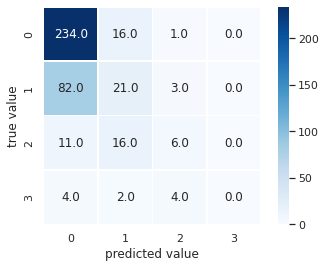

In [456]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y2_pred3)
sns.heatmap(mat, square=True, annot=True,cmap=plt.cm.Blues, cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

In [457]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(y_test, y2_pred3, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.71      0.93      0.80       251
     class 1       0.38      0.20      0.26       106
     class 2       0.43      0.18      0.26        33
     class 3       0.00      0.00      0.00        10

    accuracy                           0.65       400
   macro avg       0.38      0.33      0.33       400
weighted avg       0.58      0.65      0.59       400



>## TASK-12D: Please use the new dataset (selected) beginning with the 16th column after scaling it with minmax scaler. Then apply the k-means algorithm on the scaled dataset for k=4 and then visualize it with respect to their labels on 2 dimensions obtained via tSNE. 

In [471]:
from sklearn.preprocessing import MinMaxScaler
data_selected=pd.read_excel("CDR_6_MRI_selected.xlsx")
data_selected

,SEX,INDEPEND,MEMORY,ORIENT,JUDGMENT,COMMUN,HOMEHOBB,PERSCARE,CDRGLOB,NPISCORE,...,RCUNM,RENT,RENTM,RINFTEMM,HIPPO_OCCORT,HIPPO_FR,HIPPO_PART,TEMPCOR_OCCO,TEMPCOR_PART,TEMPCOR_FR
0,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001607,0.004238,0.003373,0.003417,0.111574,0.043659,0.071193,1.845465,1.177555,0.722137
1,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001344,0.002923,0.003376,0.002431,0.126403,0.037998,0.070236,2.120735,1.178385,0.637517
2,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001482,0.003885,0.003288,0.003673,0.098596,0.039798,0.064722,1.943518,1.275791,0.784483
3,1,1,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0.001215,0.003262,0.002945,0.002663,0.083988,0.031922,0.056775,1.877109,1.268896,0.713439
4,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001197,0.003599,0.002683,0.001890,0.119211,0.038113,0.075887,2.116505,1.347315,0.676674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,2,1,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0.001671,0.003623,0.004062,0.004795,0.079718,0.027704,0.050209,1.752248,1.103610,0.608947
1596,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001556,0.002941,0.002707,0.002837,0.090957,0.029977,0.053822,2.018954,1.194670,0.665390
1597,1,2,1.0,1.0,1.0,1.0,1.0,1,2,7,...,0.001389,0.003687,0.002828,0.001960,0.109992,0.033818,0.064928,2.195281,1.295854,0.674956
1598,2,1,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0.001748,0.003810,0.004254,0.003466,0.113124,0.033928,0.063884,2.101571,1.186804,0.630296


In [472]:
X_selected = data_selected.iloc[:,15:]
y=data_selected['CDRGLOB']

In [473]:
scaler=MinMaxScaler()
X_selected_scaled=scaler.fit_transform(X_selected)

In [474]:
tsne = TSNE(n_components=2, init='random', random_state=0)
X_slc_tsne = tsne.fit_transform(X_selected_scaled)

In [475]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(X_selected_scaled)
kmeans.cluster_centers_.shape

(4, 23)

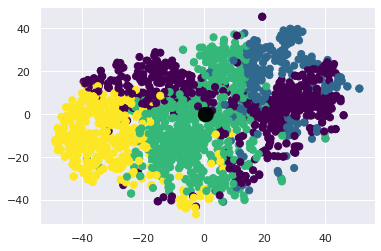

In [476]:
plt.scatter(X_slc_tsne[:, 0], X_slc_tsne[:, 1], c=clusters, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

In [477]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(4):
    mask = (clusters == i)
    labels[mask] = mode(y)[0]

In [478]:
from sklearn.metrics import accuracy_score
accuracy_score(y, labels)

0.62875

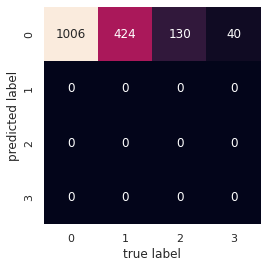

In [479]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [480]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
X_proj = tsne.fit_transform(X_selected_scaled)

# Compute the clusters
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(X_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(y)[0]

# Compute the accuracy
accuracy_score(y, labels)

0.62875

>## TASK-12E: Please use the silhouette algorithm to find the optimal number of clusters (k=2, 3, 4, …. 50). Please visualize the silhouette scores within this range and decide the most appropriate cluster number. Then apply the suitable cluster number using K-means. 

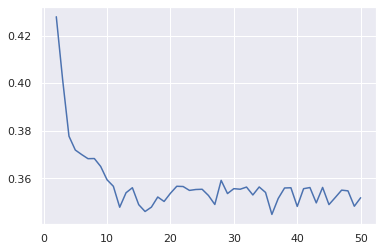

In [467]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_val_list=[]
range_n_clusters = range(2,51)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_slc_tsne)
    silhouette_avg = silhouette_score(X_slc_tsne, cluster_labels)
    silhouette_val_list.append(silhouette_avg)
plt.plot(range_n_clusters,silhouette_val_list)

In [468]:
silhouette_val_list

[0.4278965,
 0.40144843,
 0.37766194,
 0.37183586,
 0.36994022,
 0.3682034,
 0.36826065,
 0.3649279,
 0.3593384,
 0.3565916,
 0.34778142,
 0.35387704,
 0.35598555,
 0.34885943,
 0.34598976,
 0.34782317,
 0.35208616,
 0.35021085,
 0.3536507,
 0.35659587,
 0.35649392,
 0.35486087,
 0.3552382,
 0.35533977,
 0.3527141,
 0.34894848,
 0.35907215,
 0.35353133,
 0.35559365,
 0.35535753,
 0.35626376,
 0.35294655,
 0.35630882,
 0.3540008,
 0.34476155,
 0.35147178,
 0.3558757,
 0.35597116,
 0.348116,
 0.35558018,
 0.356061,
 0.349612,
 0.3561142,
 0.34888762,
 0.3518902,
 0.35497376,
 0.3546723,
 0.3481975,
 0.3517753]

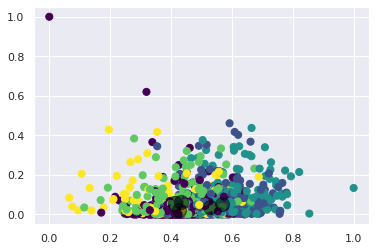

In [482]:

kmeans = KMeans(n_clusters=5)
kmeans.fit(X_selected_scaled)
y_kmeans = kmeans.predict(X_selected_scaled)
    
plt.scatter(X_selected_scaled[:, 0], X_selected_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

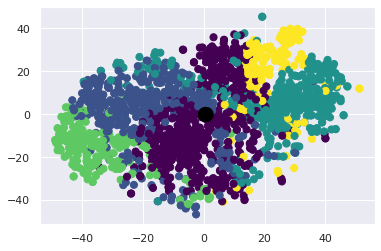

In [483]:
plt.scatter(X_slc_tsne[:, 0], X_slc_tsne[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

In [484]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=12, random_state=0)
clusters_12 = kmeans.fit_predict(X_selected_scaled)
centers=kmeans.cluster_centers_

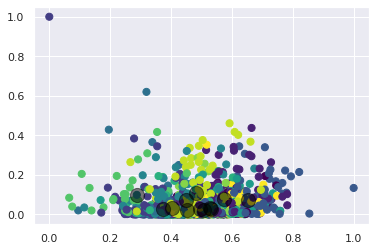

In [485]:
plt.scatter(X_selected_scaled[:, 0], X_selected_scaled[:, 1], c=clusters_12, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

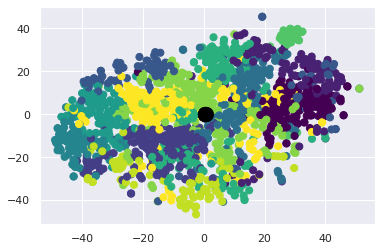

In [486]:
plt.scatter(X_slc_tsne[:, 0], X_slc_tsne[:, 1], c=clusters_12, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

In [487]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(12):
    mask = (clusters == i)
    labels[mask] = mode(y)[0]

In [488]:
from sklearn.metrics import accuracy_score
accuracy_score(y, labels)

0.62875

In [494]:
colm=X_selected.columns

In [495]:
X_selected_scaled=pd.DataFrame(X_selected_scaled,columns=colm)

In [496]:
X_selected_scaled

,GRAYVOL,WMHVOL,HIPPOVOL,CERETISS,LATVENT,FRCORT,OCCCORT,PARCORT,TEMPCOR,LCUNM,...,RCUNM,RENT,RENTM,RINFTEMM,HIPPO_OCCORT,HIPPO_FR,HIPPO_PART,TEMPCOR_OCCO,TEMPCOR_PART,TEMPCOR_FR
0,0.344663,0.002767,0.703948,0.142342,0.050514,0.462683,0.506984,0.530359,0.536376,0.382083,...,0.506978,0.623181,0.424418,0.548037,0.486278,0.492213,0.528331,0.381264,0.352752,0.407166
1,0.385181,0.002420,0.642849,0.139411,0.040614,0.601921,0.258902,0.477425,0.481322,0.289712,...,0.397292,0.318373,0.424760,0.335593,0.603529,0.380477,0.515270,0.571450,0.353701,0.262707
2,0.401529,0.037866,0.601984,0.249821,0.037371,0.483204,0.580030,0.558386,0.714509,0.295183,...,0.455037,0.541406,0.411882,0.603110,0.383661,0.415993,0.440085,0.449009,0.465150,0.513600
3,0.538369,0.000000,0.467787,0.141255,0.021600,0.647454,0.659142,0.587849,0.737831,0.266528,...,0.343042,0.396963,0.361983,0.385542,0.268151,0.260548,0.331712,0.403127,0.457260,0.392318
4,0.351128,0.000393,0.623560,0.160407,0.011036,0.573726,0.318074,0.336809,0.553133,0.199419,...,0.335527,0.475100,0.323637,0.219256,0.546659,0.382749,0.592328,0.568527,0.546985,0.329554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.644826,0.007319,0.470360,0.432300,0.365676,0.898263,0.756020,0.814998,0.710038,0.299769,...,0.533756,0.480819,0.524813,0.844737,0.234390,0.177306,0.242176,0.316859,0.268146,0.213935
1596,0.703633,0.056173,0.485248,0.331703,0.432474,0.779481,0.551569,0.709391,0.754791,0.295738,...,0.485682,0.322548,0.327133,0.423176,0.323256,0.222165,0.291446,0.501129,0.372333,0.310291
1597,0.573486,0.089922,0.578226,0.154030,0.601285,0.707922,0.380826,0.521386,0.701540,0.337010,...,0.416093,0.495518,0.344823,0.234361,0.473770,0.297976,0.442887,0.622955,0.488104,0.326621
1598,0.618309,0.139846,0.673998,0.397492,0.465302,0.833240,0.450885,0.678022,0.708246,0.166447,...,0.566311,0.524037,0.552878,0.558531,0.498532,0.300142,0.428653,0.558210,0.363333,0.250380


In [497]:
X_selected_scaled.pivot_table("HIPPOVOL",index=clusters_12,columns=y)

CDRGLOB,0,1,2,3
0,0.679712,0.654173,0.622635,NaN
1,0.759661,0.750061,0.735320,0.590802
2,0.573982,0.510384,0.482435,0.357903
3,0.596725,0.570866,0.535618,NaN
4,0.721973,0.718038,0.805531,0.817873
5,0.405440,0.323056,0.272438,0.261974
6,0.496204,0.496188,0.511412,0.422463
7,0.620248,0.580978,0.580512,0.502574
8,0.708999,0.686417,0.588549,NaN
9,0.633879,0.618160,0.582735,0.697208


In [498]:
X_selected_scaled.pivot_table("HIPPOVOL",index=clusters_12,columns=y, aggfunc = "count")

CDRGLOB,0,1,2,3
0,105.0,45.0,3.0,NaN
1,71.0,38.0,5.0,1.0
2,137.0,46.0,21.0,3.0
3,63.0,29.0,5.0,NaN
4,115.0,33.0,1.0,2.0
5,8.0,27.0,31.0,12.0
6,53.0,41.0,17.0,5.0
7,130.0,35.0,9.0,4.0
8,21.0,11.0,3.0,NaN
9,149.0,45.0,6.0,3.0


>## TASK-12F: Please use the final dataset but this time add the following columns and then run the model with grid search optimization:SEX,INDEPEND,NPISCORE,FAQ


In [506]:
data_selected=pd.read_excel("CDR_6_MRI_selected.xlsx")
data_new=data_selected[["SEX", "INDEPEND", "FAQ", "NPISCORE"]]    
data = data_selected.iloc[:,15:]
X = pd.concat((data, data_new), axis = 1)
data_framed = pd.DataFrame(X)

In [507]:
data_framed

,GRAYVOL,WMHVOL,HIPPOVOL,CERETISS,LATVENT,FRCORT,OCCCORT,PARCORT,TEMPCOR,LCUNM,...,HIPPO_OCCORT,HIPPO_FR,HIPPO_PART,TEMPCOR_OCCO,TEMPCOR_PART,TEMPCOR_FR,SEX,INDEPEND,FAQ,NPISCORE
0,0.538469,0.000522,0.006573,0.863848,0.012068,0.150552,0.058912,0.092326,0.108719,0.001518,...,0.111574,0.043659,0.071193,1.845465,1.177555,0.722137,2,1,0,0
1,0.548315,0.000457,0.006276,0.863232,0.010662,0.165166,0.049651,0.089356,0.105296,0.001289,...,0.126403,0.037998,0.070236,2.120735,1.178385,0.637517,2,1,0,0
2,0.552288,0.007150,0.006077,0.886453,0.010202,0.152706,0.061638,0.093899,0.119795,0.001303,...,0.098596,0.039798,0.064722,1.943518,1.275791,0.784483,2,1,0,0
3,0.585542,0.000000,0.005425,0.863620,0.007963,0.169945,0.064592,0.095552,0.121245,0.001231,...,0.083988,0.031922,0.056775,1.877109,1.268896,0.713439,1,1,0,1
4,0.540040,0.000074,0.006182,0.867648,0.006463,0.162207,0.051860,0.081467,0.109761,0.001065,...,0.119211,0.038113,0.075887,2.116505,1.347315,0.676674,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.611413,0.001382,0.005437,0.924830,0.056812,0.196269,0.068208,0.108297,0.119517,0.001314,...,0.079718,0.027704,0.050209,1.752248,1.103610,0.608947,2,1,0,1
1596,0.625704,0.010606,0.005510,0.903673,0.066296,0.183802,0.060576,0.102371,0.122300,0.001304,...,0.090957,0.029977,0.053822,2.018954,1.194670,0.665390,2,1,0,0
1597,0.594076,0.016979,0.005962,0.866307,0.090262,0.176291,0.054202,0.091823,0.118989,0.001406,...,0.109992,0.033818,0.064928,2.195281,1.295854,0.674956,1,2,16,7
1598,0.604969,0.026405,0.006427,0.917510,0.070956,0.189444,0.056817,0.100611,0.119406,0.000983,...,0.113124,0.033928,0.063884,2.101571,1.186804,0.630296,2,1,0,1


In [509]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data_framed, y, test_size=0.25, random_state=42)
svc = SVC()
svc.fit(Xtrain, Ytrain)
Ypred = svc.predict(Xtest)
print("Accuracy:",accuracy_score(Ytest, Ypred))

Accuracy: 0.8325


>## TASK-12G: Then for comparison purposes, use only these four columns to develop a model):SEX,INDEPEND,NPISCORE,FAQ



In [515]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data_new, y, test_size=0.25, random_state=42)
param_grid = [{'n_estimators' : [50,70,100,130,150], 
               'max_depth': [5, 10,15],
               'min_samples_split' : [2,3]}]
     
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit=True)
grid.fit(Xtrain, Ytrain)
grid.best_params_
predictions = grid.predict(Xtest)

print(accuracy_score(Ytest, predictions))

0.84
